In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import sys
sys.path.append("/workspaces/ood/")
import warnings

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

import torch
from scripts_ood.draw import draw_score_distr_plot
from scripts_ood.ood_metrics import get_measures
from scripts_ood.utils import prettify_value

device = torch.device("cuda")
torch.cuda.is_available()

True

# vit_base_patch16_384 no linear image net head

In [3]:
from scripts_ood.ood_detection import compute_softmax_and_energy

model_name = 'vit_base_patch16_384_nohead'
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path=f"../data/trained_models/{model_name}_cifar_linear_model.pth",
    emb_size=768,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.98150
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:03<00:00, 8014.80it/s]


 vit_base_patch16_384_nohead softmax scores: 
 auroc 0.99557
 aupr  0.99179
 FPR95 0.01033


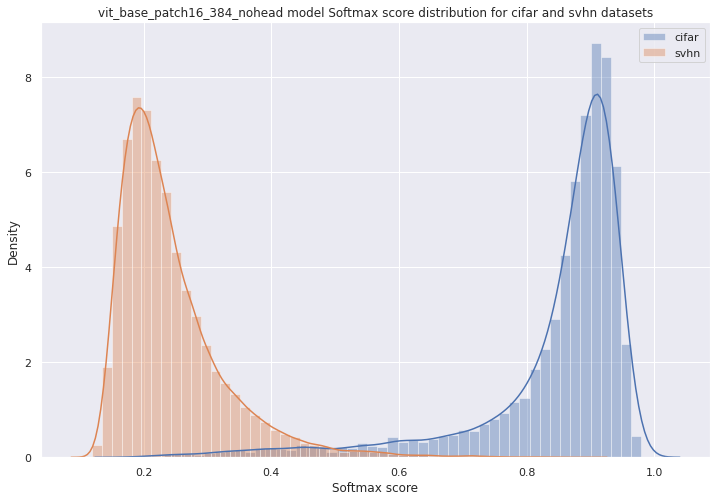

In [4]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 vit_base_patch16_384_nohead energy scores: 
 auroc 0.99564
 aupr  0.99210
 FPR95 0.00734


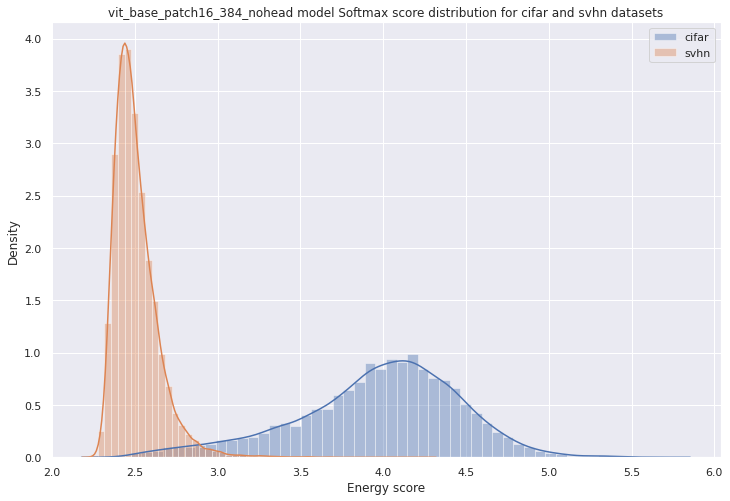

In [5]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

# vit_base_patch16_384 with 1000 head

### Perform out of distribution detection

In [4]:
from scripts_ood.ood_detection import compute_softmax_and_energy

model_name = "vit_base_patch16_384"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path=f"../data/trained_models/{model_name}_cifar_linear_model.pth",
    emb_size=1000,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.98000
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:02<00:00, 8706.02it/s]


 vit_base_patch16_384 softmax scores: 
 auroc 0.99533
 aupr  0.99131
 FPR95 0.01018


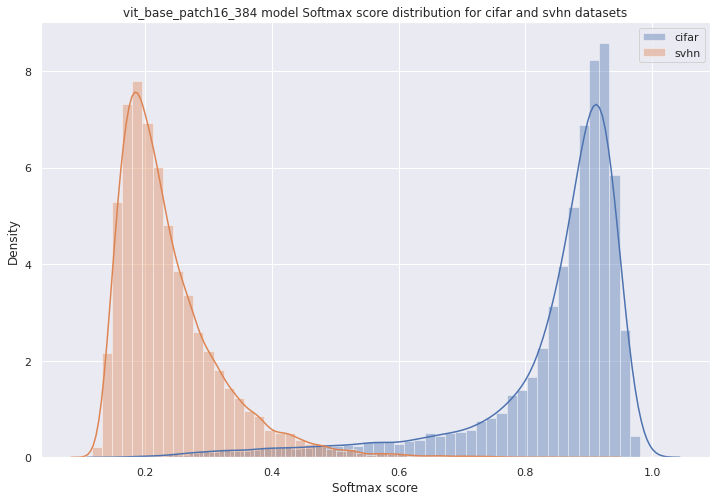

In [5]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 vit_base_patch16_384 energy scores: 
 auroc 0.99628
 aupr  0.99325
 FPR95 0.00615


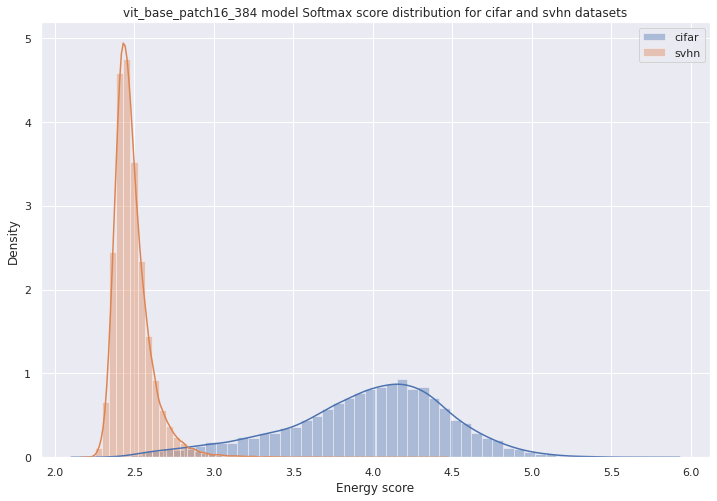

In [6]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

# Cross Entropy ImageNet pretrain

### Perform out of distribution detection

In [2]:
from scripts_ood.ood_detection import compute_softmax_and_energy

model_name = "soft"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path="../data/trained_models/soft_cifar_linear_model0.8800test_accuracy.pth",
    emb_size=1000,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.88040
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:02<00:00, 9818.16it/s] 


 soft softmax scores: 
 auroc 0.91962
 aupr  0.87665
 FPR95 0.46869


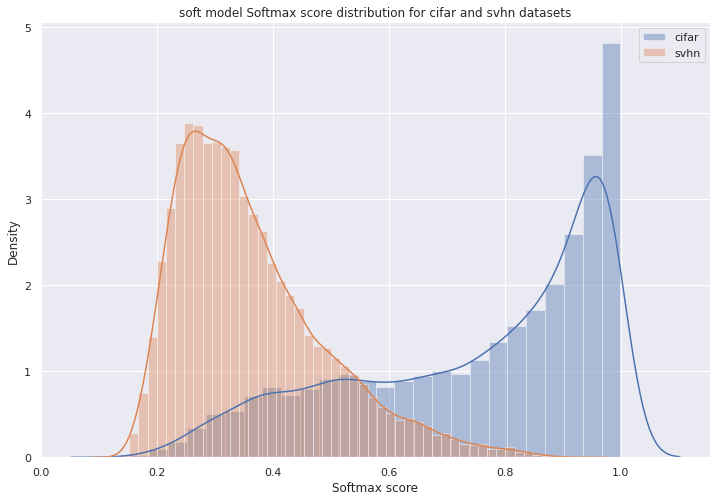

In [3]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 soft energy scores: 
 auroc 0.94235
 aupr  0.90845
 FPR95 0.36144


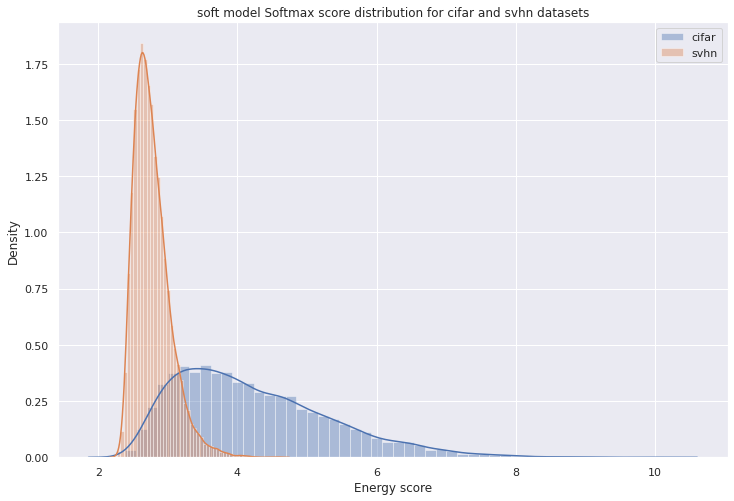

In [4]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

# MoCo v2 ImageNet pretrain

### Perform out of distribution detection

In [5]:
from scripts_ood.ood_detection import compute_softmax_and_energy

model_name = "moco"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path="../data/trained_models/moco_cifar_linear_model0.8382test_accuracy.pth",
    emb_size=2048,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.83830
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:02<00:00, 10838.75it/s]


 moco softmax scores: 
 auroc 0.63452
 aupr  0.50252
 FPR95 0.95386


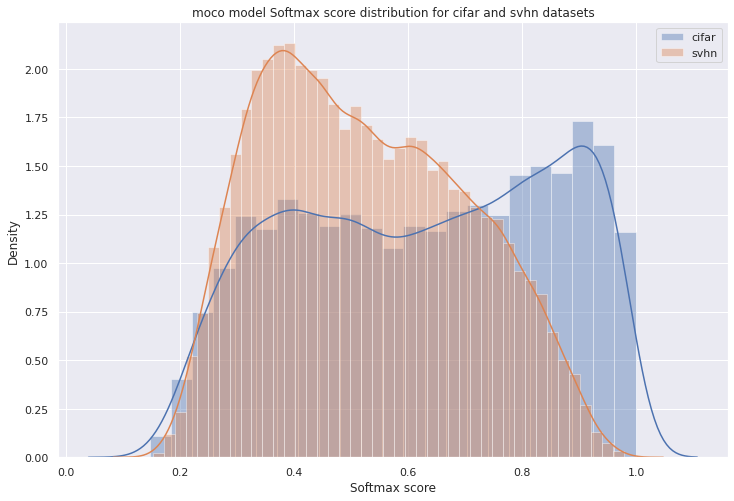

In [6]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 moco energy scores: 
 auroc 0.57447
 aupr  0.47079
 FPR95 0.98609


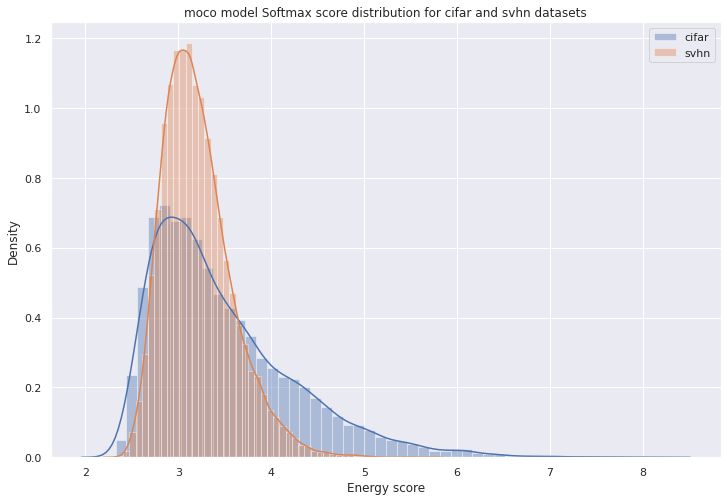

In [7]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

# BYOL ImageNet pretrain (svhn in dist)

In [7]:
from scripts_ood.ood_detection import compute_softmax_and_energy

model_name = "byol"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path=f"../data/trained_models/{model_name}_svhn_linear_model.pth",
    emb_size=2048,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    in_distr_ds_name="svhn",
    out_distr_ds_name="cifar",
    device=device,
)

Linear model in distribution test accuracy: 0.77282
Computing softmax and energy scores...


100%|██████████| 10000/10000 [00:01<00:00, 9970.49it/s]


 byol softmax scores: 
 auroc 0.47015
 aupr  0.70307
 FPR95 0.98890


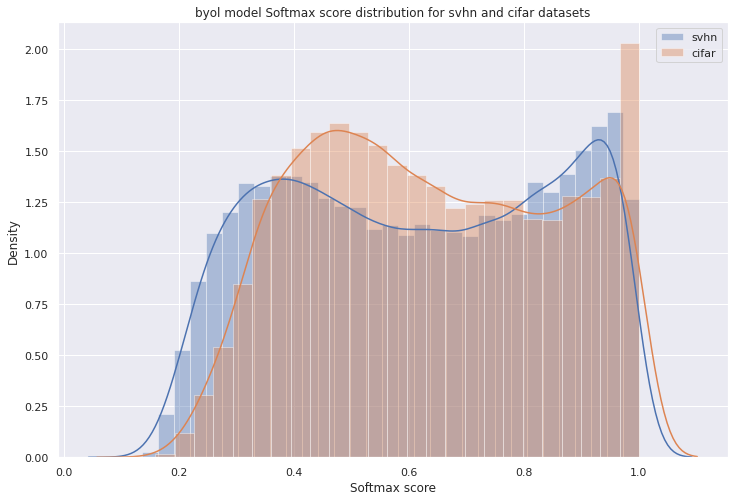

In [8]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="svhn",
    out_data_name="cifar",
)
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["svhn"], softmax_scores_distr["cifar"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 byol energy scores: 
 auroc 0.26085
 aupr  0.58664
 FPR95 0.99210


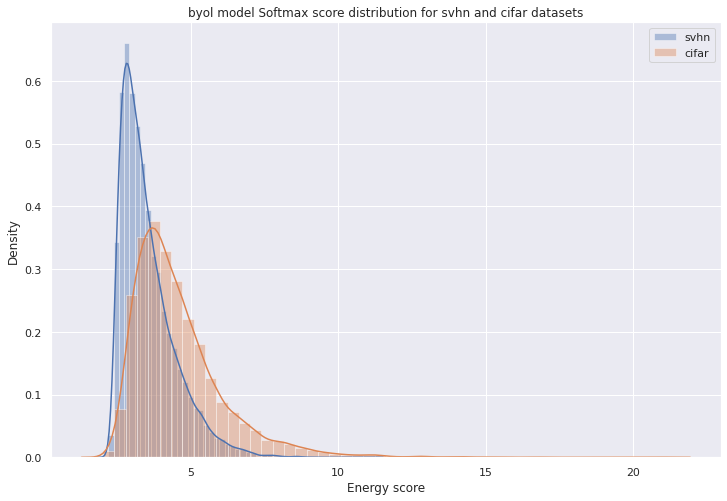

In [9]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="svhn",
    out_data_name="cifar",
)
auroc, aupr, fpr = get_measures(
    energy_scores_distr["svhn"], energy_scores_distr["cifar"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

# BYOL ImageNet pretrain

### Perform out of distribution detection

In [8]:
from ood.ood_detection import compute_softmax_and_energy

model_name = "byol"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path=f"../data/trained_models/{model_name}_cifar_linear_model0.905test_accuracy.pth",
    emb_size=2048,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.90480
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:02<00:00, 10560.65it/s]


 byol softmax scores: 
 auroc 0.94404
 aupr  0.90462
 FPR95 0.33443


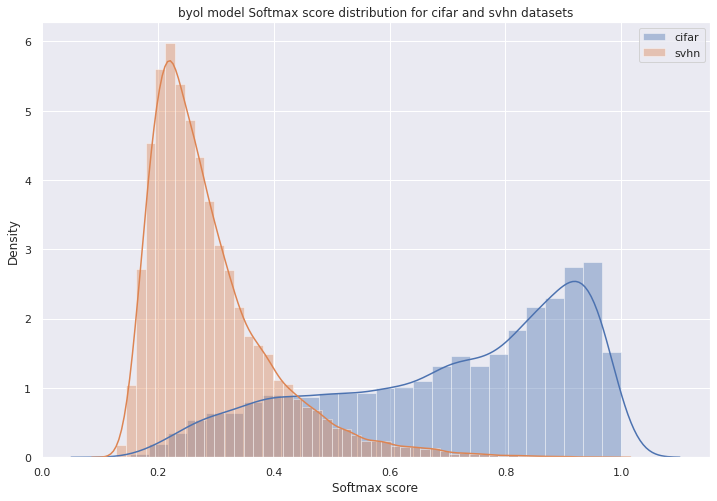

In [9]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 byol energy scores: 
 auroc 0.95593
 aupr  0.91585
 FPR95 0.23698


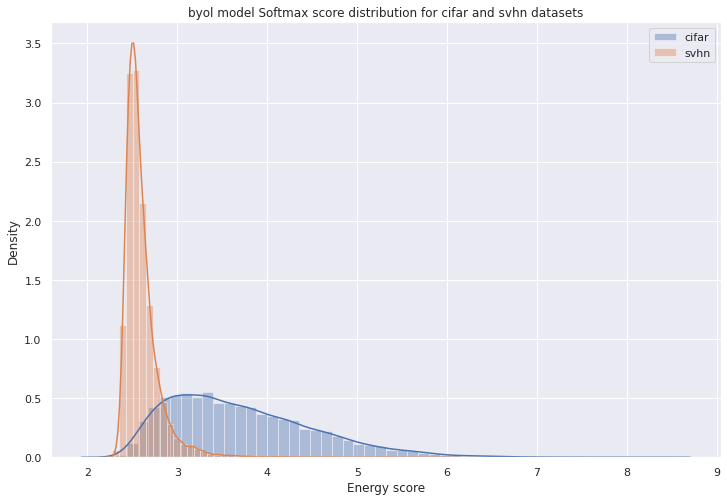

In [10]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")